# Covid-19 Statistics Using Simulated Data

***

<br>

## Objectives of this Project

***

The objective of this project is to synthesise and simulate some data about Covid-19 cases in Ireland using the NumPy Random package and basing this off real data from sources such as the the World Health Organisation, the Central Statistics Office in Ireland (CSO), the Health Service Executive (HSE) in Ireland and GeoHive (Ireland's National Geospatial Data Hub). The sample size will be 100 and the variables that I will analyse will be:

- Age
- Gender
- Underlying Conditions
- Vaccination Status
- Hospitalisation
- Admission to ICU
- Death/Recovery

To breakdown this project and to start it, I am going to focus on the Age variable first. I will get some statistics from the web and get the age data simulated and put this into a Pandas DataFrame using NumPy. Because there is lots of data on Covid-19 in Ireland on the web from different time periods, I will be using as much of the data as I can from the beginning of the pandemic up until the present. I will use all of this data to create a simulated dataset that encapsulates the whole pandemic. The code will be such that the input variables for the data can be changed as time goes on and more data is available. The aim of the project is to be able to simulate data into the future and to possibly predict future trends in the pandemic.<br>

***

## Covid-19 in Ireland and the Rest of the World

***

I think that it is safe to say that anyone reading this notebook has firm enough grasp on what has been happening with this disease in the last 2 years. In December 2019 the first known case of the virus SARS-CoV-2 was identified in Wuhan, China. The disease has since spread worldwide, leading to an ongoing pandemic. [16] SARS-CoV-2 is a coronavirus. Each SARS-CoV-2 virion is 50–200 nanometres in diameter. Like other coronaviruses, SARS-CoV-2 has four structural proteins, known as the S (spike), E (envelope), M (membrane), and N (nucleocapsid) proteins; the N protein holds the RNA genome, and the S, E, and M proteins together create the viral envelope. [17]

![SARS-CoV-2](https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Coronavirus._SARS-CoV-2.png/768px-Coronavirus._SARS-CoV-2.png)<br>
**SARS-CoV-2 (virus)**

Symptoms of COVID-19 are variable, but often include fever, cough, headache, fatigue, breathing difficulties, and loss of smell and taste. Symptoms may begin one to fourteen days after exposure to the virus. COVID-19 transmits when people breathe in air contaminated by droplets and small airborne particles containing the virus. The risk of breathing these in is highest when people are in close proximity, but they can be inhaled over longer distances, particularly indoors. [16] The diagram below illustrates the Transmission and life-cycle of SARS-CoV-2 causing COVID-19.

![](https://upload.wikimedia.org/wikipedia/commons/4/48/Fphar-11-00937-g001.jpg)<br>
**Transmission and life-cycle of SARS-CoV-2 causing COVID-19**

## Age Groups

The first variable in the dataset that I am going to simulate is age. Using NumPy's Random module, I will use `numpy.random.Generator.choice` and `numpy.random.Generator.integers` to generate these ages. Using the data that is available, I will use the percentages of people within each age group that contract COVID-19 as the probability parameter in the `choice` random generator. I will then also use a series of if statements to decide which `integers` to use on them.<br>

From the CSO website, COVID-19 Deaths and Cases, Series 36: [04]. This data is from 16/11/2021 up to the 12/11/2021:

![Cases By Age-CSO](img/2021_12_01_18_27_25_covid_19_deaths_and_cases.png)

From HSE Epidemiology  of COVID-19 in  Ireland  -  14  day  report Summary  characteristics  of  confirmed  COVID-19  cases  notified  in Ireland from  24/11/2021  up  to  midnight on 07/12/2021:

![Cases By Age-HSE](img/2021_12_17_17_25_30-cidr_14_day_report_20211208.png)

Since the HSE site tell us a bit more about the age groups, I am going to use this data since it has more age groups. The percentages are slightly different to the CSO data when calculated as seen below which is a point of interest.

In [1]:
# Imports

# Numerical arrays
import numpy as np

# Pandas DataFrame
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# Magic function 
%matplotlib inline

# Change default style sheet
plt.style.use('fivethirtyeight')

# Change the default parameters
plt.rcParams['figure.figsize'] = [10, 6]

# Seaborn plots
import seaborn as sns

### Comparing the Percentages

Below I have calculated the percent cases by age groups from the CSO table since it was not provided. They turn out to be slightly different the HSE data, but as said above, I am going to use this data since it has more age groups.

In [2]:
# Age groups as a 1d NumPy array

age_groups_cso = (['0-14', '15-24', '25-44', '45-64', '65-79', '80+'])

In [3]:
age_cases_cso = ([80308, 96151, 160951, 110574, 33681, 16071])
total_age_cases_cso = 497736

In [4]:
# Function to calculate percentages [06]

def get_percent(numer, denom, integer = False):
   percent = numer / denom * 100
   
   if integer:
       return int(percent)
   return percent

In [5]:
# Calculate the percentages of cases for each age group [01]

for i, j in zip(age_cases_cso, age_groups_cso):
    percentage = get_percent(i, total_age_cases_cso)
    print(f"The percentage of age group {j} is {round(percentage, 2)}%")

The percentage of age group 0-14 is 16.13%
The percentage of age group 15-24 is 19.32%
The percentage of age group 25-44 is 32.34%
The percentage of age group 45-64 is 22.22%
The percentage of age group 65-79 is 6.77%
The percentage of age group 80+ is 3.23%


From the above data on the CSO website, I have created some variables and a pandas dataframe. I used NumPy Random Choice to with the various probabilities to simulate the data.

In [6]:
# Age groups as a 1d NumPy array

age_groups = (['0-4', '5-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])

In [7]:
age_cases = ([3397, 13560, 3878, 5454, 9124, 12081, 8276, 5328, 2810, 701, 161])
total_age_cases = 64780
probabilities = [0.052, 0.21, 0.06, 0.084, 0.141, 0.187, 0.128, 0.082, 0.043, 0.011, 0.002]

In [8]:
# Set the Random Number Generator with a seed value [07]

rng = np.random.default_rng(121) 

In [9]:
# Generate a random sample from the age_cases array [08]

patient_ages = rng.choice(age_groups, size = 1000, p = probabilities)
patient_ages

array(['35-44', '13-18', '45-54', '35-44', '35-44', '45-54', '25-34',
       '19-24', '5-12', '0-4', '45-54', '35-44', '55-64', '25-34',
       '45-54', '35-44', '35-44', '5-12', '35-44', '0-4', '35-44',
       '19-24', '45-54', '35-44', '25-34', '35-44', '35-44', '35-44',
       '5-12', '13-18', '35-44', '19-24', '25-34', '0-4', '45-54', '5-12',
       '55-64', '19-24', '13-18', '25-34', '45-54', '25-34', '45-54',
       '75-84', '45-54', '5-12', '45-54', '5-12', '65-74', '25-34',
       '13-18', '5-12', '13-18', '45-54', '5-12', '5-12', '19-24',
       '25-34', '45-54', '0-4', '5-12', '45-54', '5-12', '35-44', '0-4',
       '19-24', '35-44', '25-34', '45-54', '0-4', '19-24', '45-54',
       '35-44', '13-18', '19-24', '75-84', '35-44', '35-44', '5-12',
       '5-12', '5-12', '65-74', '5-12', '25-34', '5-12', '5-12', '5-12',
       '13-18', '5-12', '13-18', '45-54', '45-54', '35-44', '0-4', '5-12',
       '25-34', '65-74', '55-64', '65-74', '55-64', '25-34', '25-34',
       '55-64', '3

In [10]:
# Put the patient_ages array into a Pandas DataFrame [09]

dfcovid = pd.DataFrame(data = patient_ages, columns = ['Age Group'])
dfcovid

,Age Group
0,35-44
1,13-18
2,45-54
3,35-44
4,35-44
...,...
995,65-74
996,45-54
997,35-44
998,35-44


In [11]:
# Check the amount of 25-44 year olds in the dataset

dfcovid['Age Group'].value_counts()['5-12']

225

In [12]:
# Convert the age groups to actual ages [10]

def actual_ages (x):
   if x['Age Group'] == '0-4' :
      return rng.integers (0, 5, 1)
   elif x['Age Group'] == '5-12' :
      return rng.integers (5, 13, 1)
   elif x['Age Group'] == '13-18' :
      return rng.integers (13, 19, 1)
   elif x['Age Group'] == '19-24' :
      return rng.integers (19, 25, 1)
   elif x['Age Group'] == '25-34' :
      return rng.integers (25, 35, 1)
   elif x['Age Group'] == '35-44' :
      return rng.integers (35, 45, 1)
   elif x['Age Group'] == '45-54' :
      return rng.integers (45, 56, 1)
   elif x['Age Group'] == '55-64' :
      return rng.integers (55, 65, 1)
   elif x['Age Group'] == '65-74' :
      return rng.integers (65, 75, 1)
   elif x['Age Group'] == '75-84' :
      return rng.integers (75, 85, 1)
   else:
    return rng.integers (85, 100, 1)

In [13]:
# Use pd.DataFrame.apply to add the the actual ages to the dfcovid dataframe
# [10], [11], [12], [13]

dfcovid['Age'] = dfcovid.apply (lambda x: actual_ages(x), axis = 1)
dfcovid['Age'] = dfcovid['Age'].astype(int)
dfcovid

,Age Group,Age
0,35-44,35
1,13-18,17
2,45-54,52
3,35-44,41
4,35-44,35
...,...,...
995,65-74,66
996,45-54,45
997,35-44,44
998,35-44,38


## Genders

According to the CSO site, around 49% of patients with Covid-19 are female [04]. Below I have used the NumPy Random package to simulate this date and added a column called gender to the dataframe.

In [14]:
# Ratio of Male to Female

males = 254330
females = 243277
total = males = females + males

ratio_females = females / total
ratio_females

0.48889384594670093

In [15]:
# Use rng.binomial to choose male or female [14]

patient_genders_binom = rng.binomial(1, ratio_females, 1000)

In [16]:
# Declare a the new array patient_genders_binom as a column [15]

dfcovid['Gender'] = patient_genders_binom
dfcovid

,Age Group,Age,Gender
0,35-44,35,0
1,13-18,17,0
2,45-54,52,1
3,35-44,41,1
4,35-44,35,0
...,...,...,...
995,65-74,66,1
996,45-54,45,0
997,35-44,44,1
998,35-44,38,1


In [17]:
# Function to turn the 1's and 0's into Genders [10]

def get_genders(x):
    if x['Gender'] == 0:
        return 'Male'
    else:
        return 'Female'

In [18]:
# Use pd.DataFrame.apply to add the the genders to the dfcovid dataframe
# [10], [11], [12], [13]

dfcovid['Gender'] = dfcovid.apply (lambda x: get_genders(x), axis = 1)
dfcovid.sort_values(by = ['Age'], inplace = True)
dfcovid.reset_index(drop = True, inplace = True)
dfcovid

,Age Group,Age,Gender
0,0-4,0,Female
1,0-4,0,Female
2,0-4,0,Male
3,0-4,0,Male
4,0-4,0,Male
...,...,...,...
995,75-84,83,Female
996,75-84,83,Female
997,75-84,84,Female
998,75-84,84,Female


In [19]:
# Check the amount of Males in the dataset

dfcovid['Gender'].value_counts()['Male']

537

Here I have created a pandas dataframe that has an age group for each patient, their actual age and their gender according the the CSO statistics. The next column to create will be whether or not the patients have any underlying conditions.

## Underlying Health Conditions

![Underlying Conditions-HSE](img/2021_12_20_16_25_13-underlying_conditions_summary.png)

In [20]:
# Give each individual a probability of having an underlying condition.

p_less14 = 0.096
p_less24 = 0.138
p_less34 = 0.200
p_less44 = 0.246
p_less54 = 0.336
p_less64 = 0.445
p_less74 = 0.637
p_75plus = 0.824

def binomial_uhc (x):
   if x['Age'] <= 14:
      return rng.binomial (1, p_less14, 1)
   elif x['Age'] <= 24:
      return rng.binomial (1, p_less24, 1)
   elif x['Age'] <= 34: 
      return rng.binomial (1, p_less34, 1)
   elif x['Age'] <= 44: 
      return rng.binomial (1, p_less44, 1)
   elif x['Age'] <= 54: 
      return rng.binomial (1, p_less54, 1)
   elif x['Age'] <= 64: 
      return rng.binomial (1, p_less64, 1)
   elif x['Age'] <= 74: 
      return rng.binomial (1, p_less74, 1)
   else: 
      return rng.binomial (1, p_75plus, 1)

In [21]:
dfcovid['Underlying Health Condition?'] = dfcovid.apply (lambda x: binomial_uhc(x), axis = 1)
dfcovid['Underlying Health Condition?'] = dfcovid['Underlying Health Condition?'].astype(int)

In [22]:
# Function to turn the 1's and 0's into Underlying Health Conditions [10]

def assign_uhc(x):
    if x['Underlying Health Condition?'] == 0:
        return 'No'
    else:
        return 'Yes'

In [23]:
# Use pd.DataFrame.apply to add the the underlying health conditions to the 
# dfcovid dataframe [10], [11], [12], [13]

dfcovid['Underlying Health Condition?'] = dfcovid.apply (lambda x: assign_uhc(x), axis = 1)
dfcovid

,Age Group,Age,Gender,Underlying Health Condition?
0,0-4,0,Female,No
1,0-4,0,Female,No
2,0-4,0,Male,No
3,0-4,0,Male,No
4,0-4,0,Male,No
...,...,...,...,...
995,75-84,83,Female,Yes
996,75-84,83,Female,Yes
997,75-84,84,Female,Yes
998,75-84,84,Female,Yes


## Vaccination Status

According to the 'COVID-19 Vaccination Uptake in Ireland Weekly report' by the HSPC, 93% of over 18s are vaccinated and 90.7% of over 12s are vaccinated. This data is from the week ending Sunday 14th November 2021. Below I have made a function to give each individual a probability of being vaccinated. Under 12s will all be assigned a vaccination status of unvaccinated as the role out of vaccines for children has not begun yet.

![Vaccination Stats HSPC](img/vaccination_stats_hspc.png)

In [24]:
# Give each individual a probability of being vaccinated.
# [18]
p_vaccinated_over_18 = 0.932
p_vaccinated_over_12 = 0.910

def binomial_vaccinated (x):
   if x['Age'] <= 12:
      return 0
   elif x['Age'] < 18:
      return rng.binomial (1, p_vaccinated_over_12, 1)
   else: 
      return rng.binomial (1, p_vaccinated_over_18, 1)

In [25]:
dfcovid['Vaccination Status'] = dfcovid.apply (lambda x: binomial_vaccinated(x), axis = 1)
dfcovid['Vaccination Status'] = dfcovid['Vaccination Status'].astype(int)

In [26]:
# Function to turn the 1's and 0's into Vaccinations Status [10]

def assign_vacstatus(x):
    if x['Vaccination Status'] == 0:
        return 'Unvaccinated'
    else:
        return 'Vaccinated'

In [27]:
# Use pd.DataFrame.apply to add the the underlying health conditions to the 
# dfcovid dataframe [10], [11], [12], [13]

dfcovid['Vaccination Status'] = dfcovid.apply (lambda x: assign_vacstatus(x), axis = 1)
dfcovid

,Age Group,Age,Gender,Underlying Health Condition?,Vaccination Status
0,0-4,0,Female,No,Unvaccinated
1,0-4,0,Female,No,Unvaccinated
2,0-4,0,Male,No,Unvaccinated
3,0-4,0,Male,No,Unvaccinated
4,0-4,0,Male,No,Unvaccinated
...,...,...,...,...,...
995,75-84,83,Female,Yes,Unvaccinated
996,75-84,83,Female,Yes,Vaccinated
997,75-84,84,Female,Yes,Vaccinated
998,75-84,84,Female,Yes,Vaccinated


In [28]:
dfcovid['Vaccination Status'].value_counts()['Vaccinated']

679

## Hospitalised

Below are the statistics according to the HSE on the number of confirmed COVID-19 cases in Ireland from 10/12/2021 up to midnight on 23/12/2021. This shows us the percentages of people admitted to hospital and I will use these statistics to generate a new column in the dataset of whether or not the patient was admitted to hospital. I wanted to give the patients a higher probability of being hospitalised if they were unvaccinated, but I could not find enough data to do this. I instead subtracted half of the probability from the patient if they were vaccinated and added half the probability to the patient if they were unvaccinated. This was just to show that there is a correlation between hospitalisations and being vaccinated. Since this is a simulated dataset, the actual numbers can always be changed at a later stage.

![Epidemiology of COVID-19 in Ireland - 14 day report - HSE](img/epidemiology_of_covid-19_in_ireland_14_day_report.png)

In [29]:
# Probabilities for vaccinated patients

p_vacc_less4 = 0.038 - (0.038/2)
p_vacc_less12 = 0.049 - (0.049/2)
p_vacc_less18 = 0.023 - (0.023/2)
p_vacc_less24 = 0.051 - (0.051/2)
p_vacc_less34 = 0.134 - (0.134/2)
p_vacc_less44 = 0.146 - (0.146/2)
p_vacc_less54 = 0.116 - (0.116/2)
p_vacc_less64 = 0.128 - (0.128/2)
p_vacc_less74 = 0.13 - (0.13/2)
p_vacc_less84 = 0.087 - (0.087/2)
p_vacc_85plus = 0.099 - (0.099/2)

# Probabilities for unvaccinated patients
p_unvacc_less4 = 0.038 + (0.038/2)
p_unvacc_less12 = 0.049 + (0.049/2)
p_unvacc_less18 = 0.023 + (0.023/2)
p_unvacc_less24 = 0.051 + (0.051/2)
p_unvacc_less34 = 0.134 + (0.134/2)
p_unvacc_less44 = 0.146 + (0.146/2)
p_unvacc_less54 = 0.116 + (0.116/2)
p_unvacc_less64 = 0.128 + (0.128/2)
p_unvacc_less74 = 0.13 + (0.13/2)
p_unvacc_less84 = 0.087 + (0.087/2)
p_unvacc_85plus = 0.099 + (0.099/2)

def binomial_hospitalised(x):
   if x['Vaccination Status'] == 'Vaccinated':
      if x['Age'] <= 4:
        return rng.binomial(1, p_vacc_less4, 1)
      elif x['Age'] <= 12:
        return rng.binomial(1, p_vacc_less12, 1)
      elif x['Age'] <= 18:
        return rng.binomial(1, p_vacc_less18, 1)
      elif x['Age'] <= 24:
        return rng.binomial(1, p_vacc_less24, 1)
      elif x['Age'] <= 34:
        return rng.binomial(1, p_vacc_less34, 1)
      elif x['Age'] <= 44:
        return rng.binomial(1, p_vacc_less44, 1)
      elif x['Age'] <= 54:
        return rng.binomial(1, p_vacc_less54, 1)
      elif x['Age'] <= 64:
        return rng.binomial(1, p_vacc_less64, 1)
      elif x['Age'] <= 74:
        return rng.binomial(1, p_vacc_less74, 1)
      elif x['Age'] <= 84:
        return rng.binomial(1, p_vacc_less84, 1)
      else:
        return rng.binomial(1, p_vacc_85plus, 1)
   else:
      if x['Age'] <= 4:
        return rng.binomial (1, p_unvacc_less4, 1)
      elif x['Age'] <= 12:
        return rng.binomial(1, p_unvacc_less12, 1)
      elif x['Age'] <= 18:
        return rng.binomial(1, p_unvacc_less18, 1)  
      elif x['Age'] <= 24:
        return rng.binomial(1, p_unvacc_less24, 1)  
      elif x['Age'] <= 34:
        return rng.binomial(1, p_unvacc_less34, 1)  
      elif x['Age'] <= 44:
        return rng.binomial(1, p_unvacc_less44, 1)  
      elif x['Age'] <= 54:
        return rng.binomial(1, p_unvacc_less54, 1)  
      elif x['Age'] <= 64:
        return rng.binomial(1, p_unvacc_less64, 1)
      elif x['Age'] <= 74:
        return rng.binomial(1, p_unvacc_less74, 1)  
      elif x['Age'] <= 84:
        return rng.binomial(1, p_unvacc_less84, 1)
      else:
        return rng.binomial(1, p_unvacc_85plus, 1)

In [30]:
dfcovid['Hospitalised?'] = dfcovid.apply (lambda x: binomial_hospitalised(x), axis = 1)
dfcovid['Hospitalised?'] = dfcovid['Hospitalised?'].astype(int)

In [31]:
# Function to turn the 1's and 0's into Hospitalisation Status [10]

def assign_hosstatus(x):
    if x['Hospitalised?'] == 0:
        return 'No'
    else:
        return 'Yes'

In [32]:
# Use pd.DataFrame.apply to add the underlying health conditions to the 
# dfcovid dataframe [10], [11], [12], [13]

dfcovid['Hospitalised?'] = dfcovid.apply (lambda x: assign_hosstatus(x), axis = 1)
dfcovid

,Age Group,Age,Gender,Underlying Health Condition?,Vaccination Status,Hospitalised?
0,0-4,0,Female,No,Unvaccinated,No
1,0-4,0,Female,No,Unvaccinated,Yes
2,0-4,0,Male,No,Unvaccinated,No
3,0-4,0,Male,No,Unvaccinated,No
4,0-4,0,Male,No,Unvaccinated,No
...,...,...,...,...,...,...
995,75-84,83,Female,Yes,Unvaccinated,Yes
996,75-84,83,Female,Yes,Vaccinated,No
997,75-84,84,Female,Yes,Vaccinated,No
998,75-84,84,Female,Yes,Vaccinated,No


In [33]:
# Total number of Hostpitalisations

dfcovid['Hospitalised?'].value_counts()['Yes']

63

In [34]:
print(f'''The Percentage of patients being hospitalised by COVID-19 in this 
      dataset is {get_percent(dfcovid['Hospitalised?'].value_counts()['Yes'], 1000)}%''')

The Percentage of patients being hospitalised by COVID-19 in this 
      dataset is 6.3%


According to the HSE, 554 patients of the total 70637 were hospitalised which works out to 0.78%. Our numbers are different, but this is because the patients age distribution is different as I have used different numbers from different sources for the distribution of ages.

In [35]:
# Total percentage of Hostpitalisations according to the HSE

total_cases_hse = 64780
total_hospitalisations = 545

percent = get_percent(total_hospitalisations, total_cases_hse)
print(f"The total percentage of Hostpitalisations according to the HSE is {round(percent, 2)}%")

The total percentage of Hostpitalisations according to the HSE is 0.84%


## ICU Admission

I used the same HSE report for the data on patients admitted to ICU as I did for the 'Hospitalisations' section. In the HPSC report 'Epidemiology of intensive care admissions in cases (aged 15 years and older) of COVID-19 in Ireland' that was carried out on 14.12.2021 (data from 27.06.2021 to midnight 11.12.2021), we can see that 80.1% of people admitted to ICU had underlying health conditions. For this reason, I created an If function that used the percentages below to assign the patients an ICU status, but if they had an underlying health condition, they would get 80.1% of the probability and if they did not have an underlying health condition, then they would get the remaining 19.9% of the probability.

![Epidemiology of COVID-19 in Ireland - 14 day report - HSE](img/epidemiology_of_covid-19_in_ireland_14_day_report.png)

![Underlying Health Conditions - HSE](img/hse_underlying_health_conditions.png)

In [36]:
# Give each individual a probability of being admitted to ICU.

#[19] [20]

# Probabilities for patients with underlying health conditions.

p_uhc_less24 = (0.024 / 100) * 80.1
p_uhc_less34 = (0.085 / 100) * 80.1
p_uhc_less44 = (0.133 / 100) * 80.1
p_uhc_less54 = (0.19 / 100) * 80.1
p_uhc_less64 = (0.185 / 100) * 80.1
p_uhc_less74 = (0.282 / 100) * 80.1
p_uhc_less84 = (0.094 / 100) * 80.1
p_uhc_85plus = (0.008 / 100) * 80.1

# Probabilities for patients without underlying health conditions.

p_nouhc_less24 = (0.024 / 100) * 19.9
p_nouhc_less34 = (0.085  / 100) * 19.9
p_nouhc_less44 = (0.133 / 100) * 19.9
p_nouhc_less54 = (0.19 / 100) * 19.9
p_nouhc_less64 = (0.185 / 100) * 19.9
p_nouhc_less74 = (0.282 / 100) * 19.9
p_nouhc_less84 = (0.094 / 100) * 19.9
p_nouhc_85plus = (0.008 / 100) * 19.9

def binomial_icu(x):
    if x['Hospitalised?'] == 'Yes':
        if x['Underlying Health Condition?'] == 'Yes':
            if x['Age'] <= 15:
                return 0
            elif x['Age'] <= 24:
                return rng.binomial(1, p_uhc_less24, 1)
            elif x['Age'] <= 34:
                return rng.binomial(1, p_uhc_less34, 1)
            elif x['Age'] <= 44:
                return rng.binomial(1, p_uhc_less44, 1)
            elif x['Age'] <= 54:
                return rng.binomial(1, p_uhc_less54, 1)
            elif x['Age'] <= 64:
                return rng.binomial(1, p_uhc_less64, 1)
            elif x['Age'] <= 74:
                return rng.binomial(1, p_uhc_less74, 1)
            elif x['Age'] <= 84:
                return rng.binomial(1, p_uhc_less84, 1)
            else:
                return rng.binomial(1, p_uhc_85plus, 1)
        else:
            if x['Age'] <= 15:
                return rng.binomial(1, 0, 1)
            elif x['Age'] <= 24:
                return rng.binomial(1, p_nouhc_less24, 1)
            elif x['Age'] <= 34:
                return rng.binomial(1, p_nouhc_less34, 1)
            elif x['Age'] <= 44:
                return rng.binomial(1, p_nouhc_less44, 1)
            elif x['Age'] <= 54:
                return rng.binomial(1, p_nouhc_less54, 1)
            elif x['Age'] <= 64:
                return rng.binomial(1, p_nouhc_less64, 1)
            elif x['Age'] <= 74:
                return rng.binomial(1, p_nouhc_less74, 1)
            elif x['Age'] <= 84:
                return rng.binomial(1, p_nouhc_less84, 1)
            else:
                return rng.binomial(1, p_nouhc_85plus, 1)            
    else:
        return 0

In [37]:
dfcovid['ICU?'] = dfcovid.apply (lambda x: binomial_icu(x), axis = 1)
dfcovid['ICU?'] = dfcovid['ICU?'].astype(int)

In [38]:
# Function to turn the 1's and 0's into ICU Status [10]

def assign_icustatus(x):
    if x['ICU?'] == 0:
        return 'No'
    else:
        return 'Yes'

In [39]:
# Use pd.DataFrame.apply to add the underlying health conditions to the 
# dfcovid dataframe [10], [11], [12], [13]

dfcovid['ICU?'] = dfcovid.apply (lambda x: assign_icustatus(x), axis = 1)
dfcovid

,Age Group,Age,Gender,Underlying Health Condition?,Vaccination Status,Hospitalised?,ICU?
0,0-4,0,Female,No,Unvaccinated,No,No
1,0-4,0,Female,No,Unvaccinated,Yes,No
2,0-4,0,Male,No,Unvaccinated,No,No
3,0-4,0,Male,No,Unvaccinated,No,No
4,0-4,0,Male,No,Unvaccinated,No,No
...,...,...,...,...,...,...,...
995,75-84,83,Female,Yes,Unvaccinated,Yes,No
996,75-84,83,Female,Yes,Vaccinated,No,No
997,75-84,84,Female,Yes,Vaccinated,No,No
998,75-84,84,Female,Yes,Vaccinated,No,No


In [40]:
# Total number of ICU admissions

dfcovid['ICU?'].value_counts()['Yes']

3

In [41]:
print(f'''The Percentage of patients being admitted to ICU by COVID-19 in this 
      dataset is {get_percent(dfcovid['ICU?'].value_counts()['Yes'], 1000)}%''')

The Percentage of patients being admitted to ICU by COVID-19 in this 
      dataset is 0.3%


According to the HSE, 27 patients of the total 70637 were hospitalised which works out to 0.04%. Our numbers are different, but this is because the patients age distribution is different as I have used different numbers from different sources for the distribution of ages.

## Plots

<AxesSubplot:xlabel='Age Group', ylabel='count'>

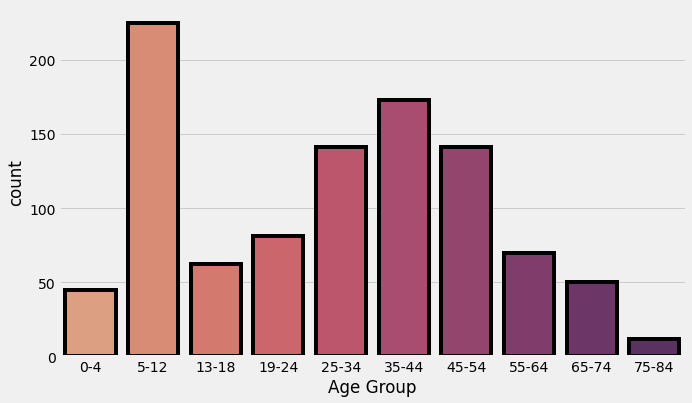

In [42]:
# Check the amount of underlying health conditions for the age group 15-24 in the dataset

sns.countplot(x = 'Age Group', data = dfcovid, palette = 'flare',
             lw=4, ec='black', capsize=0.1)

<AxesSubplot:xlabel='Age Group', ylabel='count'>

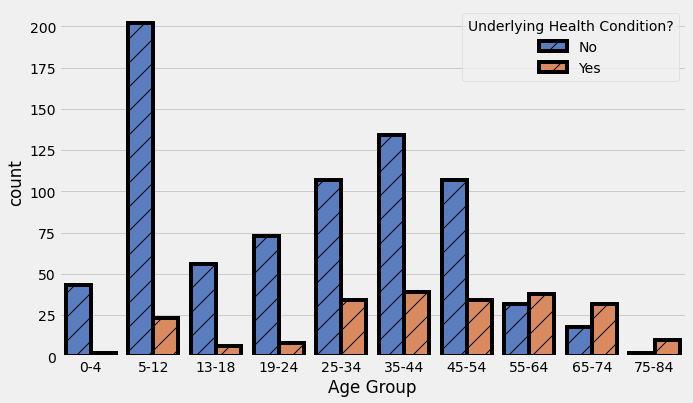

In [43]:
sns.countplot(x = 'Age Group', data = dfcovid, lw=4, ec='black', hatch='/',
              hue = 'Underlying Health Condition?', palette = 'muted')

<AxesSubplot:xlabel='Age Group', ylabel='count'>

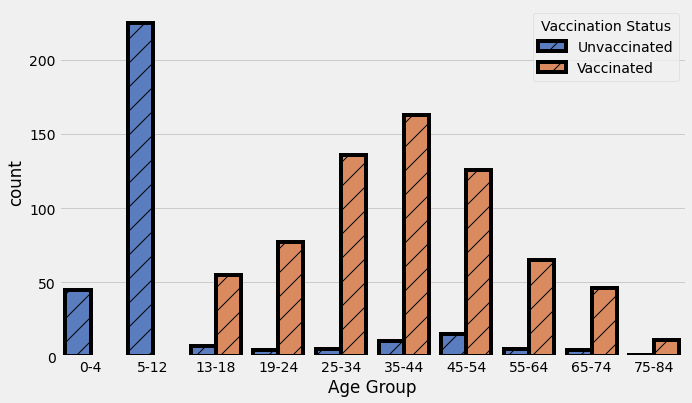

In [44]:
sns.countplot(x = 'Age Group', data = dfcovid, lw=4, ec='black', hatch='/',
              hue = 'Vaccination Status', palette = 'muted')

<AxesSubplot:xlabel='Gender', ylabel='count'>

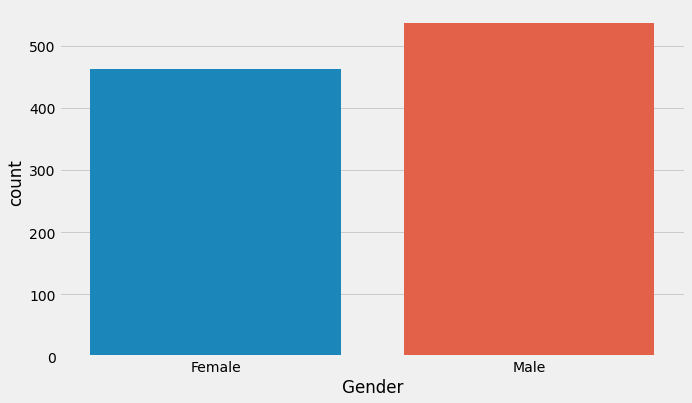

In [45]:
sns.countplot(x = 'Gender', data = dfcovid)

<AxesSubplot:xlabel='Age', ylabel='Count'>

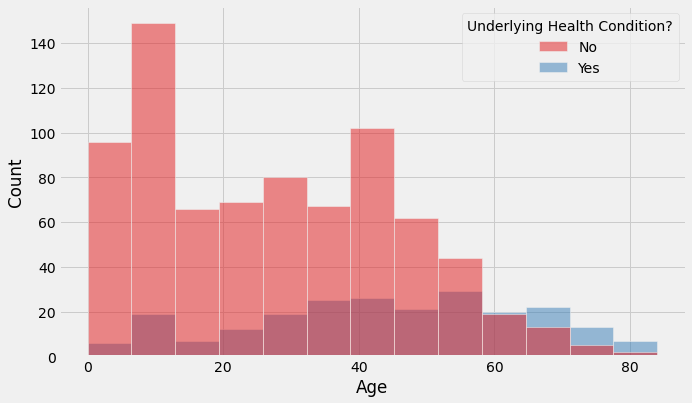

In [46]:
sns.histplot(data = dfcovid, x = 'Age',
             hue = 'Underlying Health Condition?', palette = 'Set1')

<AxesSubplot:xlabel='Age', ylabel='Count'>

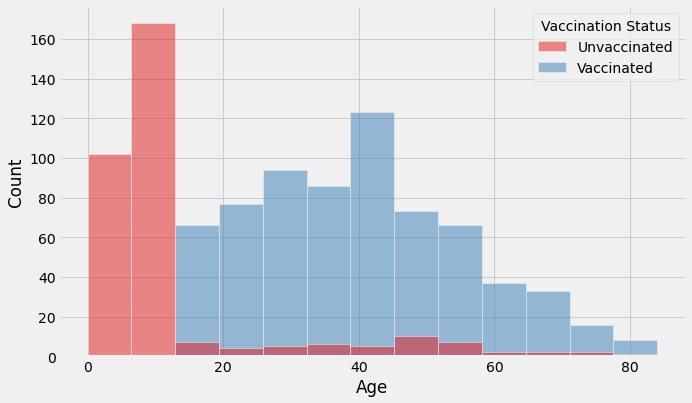

In [47]:
sns.histplot(data = dfcovid, x = 'Age',
             hue = 'Vaccination Status', palette = 'Set1')

## References

[01][DelftStack - Loop Through Multiple Lists in Python](https://www.delftstack.com/howto/python/how-to-loop-through-multiple-lists-in-python/)<br>
[02][COVID-19 Vaccination Uptake in IrelandWeekly Report ](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.hpsc.ie%2Fa-z%2Frespiratory%2Fcoronavirus%2Fnovelcoronavirus%2Fvaccination%2Fcovid-19vaccinationuptakereports%2FCOVID-19%2520Vaccination%2520Uptake%2520in%2520Ireland%2520Weekly%2520Report%2520Week%252046%25202021.pdf&clen=484980&chunk=true)<br>
[03][geohive - ICU, Acute Hospital & Testing Data](https://covid19ireland-geohive.hub.arcgis.com/pages/hospitals-icu--testing)<br>
[04][CSO - COVID-19 Deaths and Cases, Series 36](https://www.cso.ie/en/releasesandpublications/br/b-cdc/covid-19deathsandcasesseries36/)<br>
[05][CSO - COVID-19 Vaccination Statistics Series 1](https://www.cso.ie/en/releasesandpublications/br/b-cvac/covid-19vaccinationstatisticsseries1/)<br>
[06][skillsugar.com - How to Calculate a Percentage in Python](https://www.skillsugar.com/how-to-calculate-a-percentage-in-python)<br>
[07][numpy.org - Random Generator](https://numpy.org/doc/stable/reference/random/generator.html)<br>
[08][numpy.org - Choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice)<br>
[09][pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)<br>
[10][pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)<br>
[11][numpy.org - Integers](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers)<br>
[12][stackoverflow - Adding a column in pandas df using a function](https://stackoverflow.com/questions/40045632/adding-a-column-in-pandas-df-using-a-function)<br>
[13][statology.org - How to Convert Pandas DataFrame Columns to int](https://www.statology.org/pandas-convert-column-to-int/)<br>
[14][numpy.org - Binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)<br>
[15][re-thought.com - How to add new columns to Pandas dataframe?](https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/)<br>
[16][Wikipedia - Covid-19](https://en.wikipedia.org/wiki/COVID-19)<br>
[17][Wikipedia - Severe acute respiratory syndrome coronavirus 2](https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2)<br>
[18][HSE - COVID-19 Vaccination Uptake in Ireland Weekly Report ](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.hpsc.ie%2Fa-z%2Frespiratory%2Fcoronavirus%2Fnovelcoronavirus%2Fvaccination%2Fcovid-19vaccinationuptakereports%2FCOVID-19%2520Vaccination%2520Uptake%2520in%2520Ireland%2520Weekly%2520Report%2520Week%252046%25202021.pdf&clen=484980&chunk=true)<br>
[19][HSE - COVID-19 14-day epidemiology reports - December 2021](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/covid-1914-dayepidemiologyreports/)<br>
[20][HSE - Epidemiology  of COVID-19 in  Ireland  -  14  day  report](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.hpsc.ie%2Fa-z%2Frespiratory%2Fcoronavirus%2Fnovelcoronavirus%2Fsurveillance%2Fcovid-1914-dayepidemiologyreports%2FCIDR%252014%2520day%2520report%252020211208_Website.pdf&clen=845382&chunk=true)<br>
[][]()<br>
[][]()<br>
[][]()<br>


## Links to come back to
https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/covid-1914-dayepidemiologyreports/ <br>
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.hpsc.ie%2Fa-z%2Frespiratory%2Fcoronavirus%2Fnovelcoronavirus%2Fsurveillance%2Fcovid-1914-dayepidemiologyreports%2FCIDR%252014%2520day%2520report%252020211208_Website.pdf&clen=845382&chunk=true <br>
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.hpsc.ie%2Fa-z%2Frespiratory%2Fcoronavirus%2Fnovelcoronavirus%2Fsurveillance%2Fcovid-19intensivecareadmissions%2FCOVID-19_ICU_Weekly_Report_30.11.2021_website.pdf&clen=377610&chunk=true <br>
https://www.cso.ie/en/releasesandpublications/br/b-cdc/covid-19deathsandcasesseries36/ <br>
https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/underlyingconditionsreports/ <br>
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.hpsc.ie%2Fa-z%2Frespiratory%2Fcoronavirus%2Fnovelcoronavirus%2Fsurveillance%2Funderlyingconditionsreports%2FUnderlying%2520conditions%2520summary_1.0v%252014122020.pdf&clen=188877&chunk=true <br>
<br>
<br>


## END